# Ex Digit 

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, homogeneity_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


import numpy as np


In [3]:
data = load_digits()

## Visualizzazione dei dati

In [4]:
print(data.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

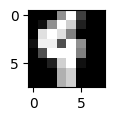

In [5]:
fig = plt.figure(figsize=((1,1)))

plt.imshow(data.images[87], cmap='gray', )

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = data.data
y = data.target

In [7]:
df["target"].describe()

count    1797.000000
mean        4.490818
std         2.865304
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: target, dtype: float64

<Figure size 500x500 with 0 Axes>

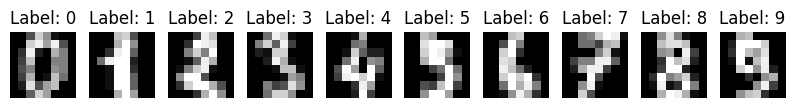

In [8]:
plt.figure(figsize=(5, 5))
n_plots = 10
fig, axs = plt.subplots(1, n_plots, figsize=(10, 5))
for i in range(n_plots):
    img = X[i].reshape((8,8))
    l = y[i]

    axs[i].imshow(img, vmax=16, vmin=0, cmap='gray')
    axs[i].axis(False)
    axs[i].set_title(f'Label: {l}')

# Training and Prediction

## Modello con PCA dim=2

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

model_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svc', SVC())
    ])    

# fit the model
model_pca.fit(X_train, y_train)
# predict y for test data
y_pred_pca = model_pca.predict(X_test)


### Visualizzazoine spazio PCA

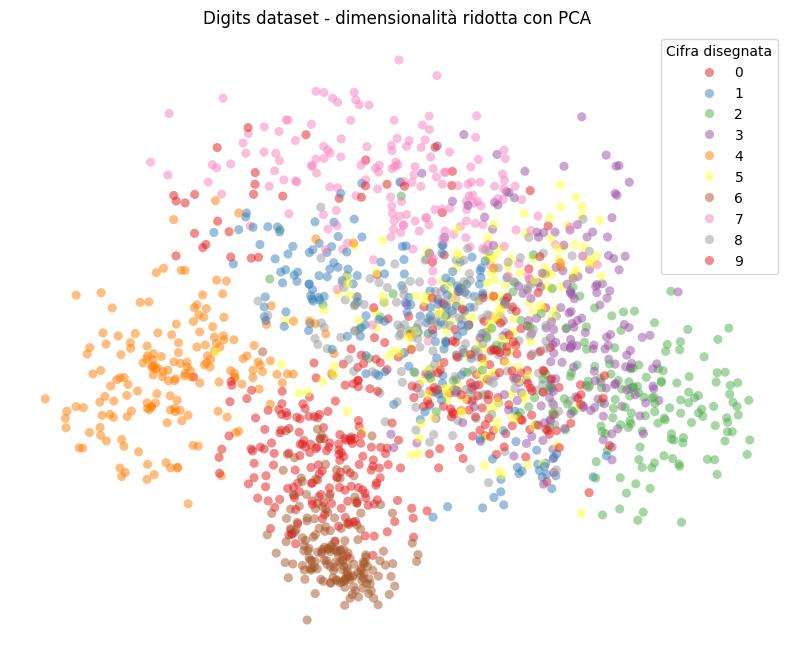

In [10]:
# trasformo X nello spazio PCA
x_pca = model_pca["pca"].transform(X)

df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1', s=43, alpha=0.5, linewidth=0)
plt.axis(False)
plt.title('Digits dataset - dimensionalità ridotta con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cifra disegnata')
plt.show()

## Modello senza PCA

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
    ])    

# fit the model
model.fit(X_train, y_train)
# predict y for test data
y_pred = model.predict(X_test)


## Modello Linear Regression (no PCA)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
    ])    

# fit the model
model_lr.fit(X_train, y_train)
# predict y for test data
y_pred_lr = model_lr.predict(X_test)


## Modello PCA con dim=10

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

model_pca10 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('svc', SVC())
    ])    

# fit the model
model_pca10.fit(X_train, y_train)
# predict y for test data
y_pred_pca10 = model_pca10.predict(X_test)

# Evaluation

In [14]:
#adjusted_rand_score, homogeneity_score
print("No PCA model:")
print(f"\tAdjusted Rand Score: {adjusted_rand_score(y_test, y_pred):.3f}")
print(f"\tHomogeneity Score: {homogeneity_score(y_test, y_pred):.3f}\n")
print("PCA dim=2 model:")
print(f"\tAdjusted Rand Score: {adjusted_rand_score(y_test, y_pred_pca):.3f}")
print(f"\tHomogeneity Score: {homogeneity_score(y_test, y_pred_pca):.3f}\n")
print("PCA dim=10 model:")
print(f"\tAdjusted Rand Score: {adjusted_rand_score(y_test, y_pred_pca10):.3f}")
print(f"\tHomogeneity Score: {homogeneity_score(y_test, y_pred_pca10):.3f}\n")
print("LogReg no PCA:")
print(f"\tAdjusted Rand Score: {adjusted_rand_score(y_test, y_pred_lr):.3f}")
print(f"\tHomogeneity Score: {homogeneity_score(y_test, y_pred_lr):.3f}\n")

No PCA model:
	Adjusted Rand Score: 0.948
	Homogeneity Score: 0.955

PCA dim=2 model:
	Adjusted Rand Score: 0.395
	Homogeneity Score: 0.525

PCA dim=10 model:
	Adjusted Rand Score: 0.844
	Homogeneity Score: 0.879

LogReg no PCA:
	Adjusted Rand Score: 0.950
	Homogeneity Score: 0.957



### Confusion matrices

Text(0.5, 0.98, 'Confusion matrices')

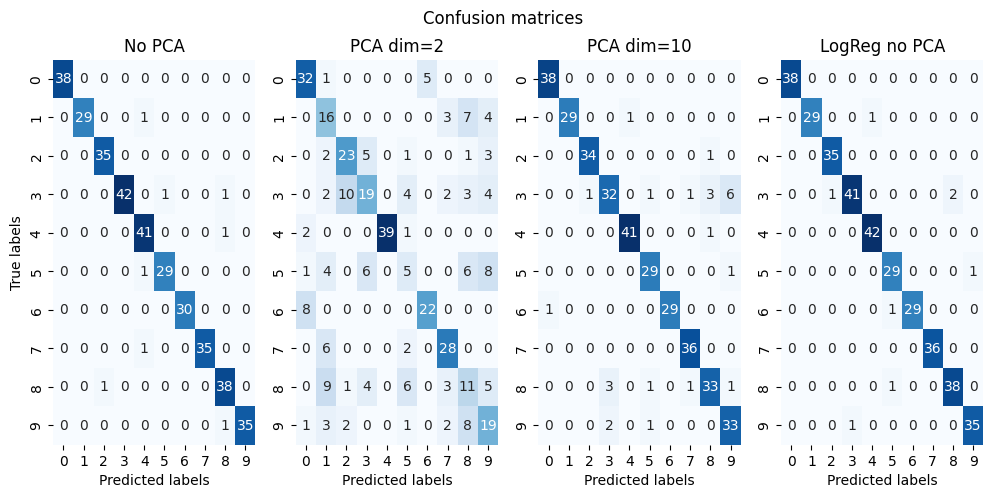

In [15]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_pca = confusion_matrix(y_test, y_pred_pca)
cm_pca10 = confusion_matrix(y_test, y_pred_pca10)
cm_lr = confusion_matrix(y_test, y_pred_lr)


fig, axes = plt.subplots(1,4, figsize=(12,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[0])
sns.heatmap(cm_pca, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[1])
sns.heatmap(cm_pca10, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[2])
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[3])

axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('No PCA')
axes[1].set_title('PCA dim=2')
axes[1].set_xlabel('Predicted labels')
axes[2].set_title('PCA dim=10')
axes[2].set_xlabel('Predicted labels')
axes[3].set_title('LogReg no PCA')
axes[3].set_xlabel('Predicted labels')

fig.suptitle("Confusion matrices")

